<a href="https://colab.research.google.com/github/denisecammarota/matbio/blob/master/tp1/P1_Ej2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1 - Ejercicio 2**: *Ecuación logística con retraso*
***Matemática de los Sistemas Biológicos - 2021***

**Alumna**: Denise S. Cammarota

In [3]:
#@title 
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint
from scipy.signal import find_peaks
plt.style.use('seaborn')

En este ejercicio nos piden estudiar la ecuación logística con retraso, dada por el sistema dinámico:

\begin{align}
\frac{dN}{dt} = r N(t) \Big[ 1 - \frac{N(t-\tau)}{K} \Big],
\end{align}

donde $r$,$K$ y $\tau$ son parámetros del problema. Observamos que introducimos un retraso $\tau$. 

Nos piden resolver numéricamente el sistema para algunos valores de parámetros y de condiciones iniciales. En particular, para $K=10$, $r=0.3,1.2,2$, $\tau = 1$ y $N(t) = 2$ para $0 < t \leq \tau$. Para estos valores, nos piden observar distintos regímenes de comportamientos: **monótono**, **oscilatorio amortiguado** y **oscilatorio sostenido**.  

Por un lado, de la teoría, sabemos que existen distintos comportamientos según  los valores de los parámetros del problema, tal que:



*   **Monótono**, si $0 < r\tau < e^{-1}$
*   **Oscilatorio amortiguado**, si $e^{-1} < r\tau < \pi/2$
*   **Oscilatorio sostenido**, si $\pi/2 < r\tau$ 

Por lo tanto, como $\tau = 1$, el comportamiento debe ser **monótono** para $r=0.3$, **oscilatorio amortiguado** para $r=1.2$ y **oscilatorio sostenido** si $r = 2$. 


In [26]:
#@title 
def logistic_delay(Y,t,d,r,K): 
    x,y = Y(t)
    xd,yd = Y(t-d)
    return np.array([r*x*(1-(xd/K)),0])

### Resolución numérica del sistema 

Primero, resolvemos el sistema numéricamente para los diferentes valores de $r$, con el resto de los parámetros fijos como detallamos anteriormente. Para ello, utilizamos la librería ddeint de Python, que nos permite resolver ecuaciones diferenciales con delays temporales. Como resultado, observamos los comportamientos descriptos por la teoría: monótono, oscilatorio amortiguado y oscilatorio sostenido, para los valores correspondientes de $r$. 

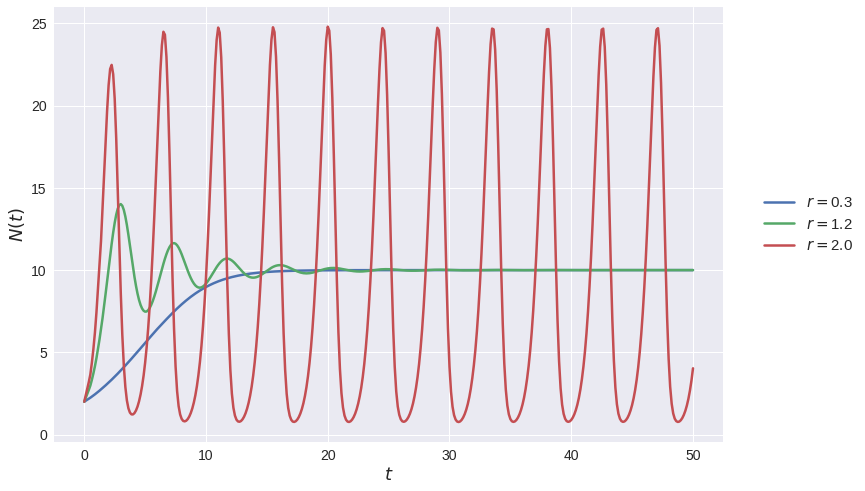

In [25]:
#@title 
n0 = 2
d = 1
K = 10.0
g = lambda t : np.array([n0,0])
tt = np.linspace(0, 50,num=401,dtype=float)
fig = plt.figure(figsize=(12,8))
for r in [0.3, 1.2, 2.0]:
    yy = ddeint(logistic_delay,g,tt,fargs=(d,r,K,))
    plt.plot(tt,yy[:,0],label=r'$r=$'+str(r),linewidth=2.5)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=15)
plt.xlabel(r'$t$',fontsize=18)
plt.ylabel(r'$N(t)$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Comparación con solución aproximada



En segundo lugar, nos piden comparar la solución numérica con una solución aproximada de la ecuación logística con retraso cerca de $N=K$. Realizando previamente una adimensionalización, nos dicen que esta solución es:

\begin{align}
N(t) = Re \Bigg\{ 1 + c e^{\frac{\epsilon t}{1 + \pi^2/4}} e^{it \Big[1 - \frac{\epsilon t}{2(1 + \pi^2/4)}\Big]} \Bigg\},
\end{align}

donde $\tau$ es un poco mayor que el valor crítico $\tau_c = \pi/2r$, es decir que $\tau = \tau_{c} + \epsilon$. 

Hemos de tener en cuenta esta adimensionalización previa a la hora de escribir el código para esta comparación. 

En el gráfico a continuación, se presentan la solución exacta y la aproximación para $K=10$, $\epsilon=10^{-4}$, $r=0.5$ y valores de $N(0)$ en un rango de $9.5-11$. Como título de cada gráfico, indicamos la condición inicial correspondiente. 

In [27]:
#@title 
def sol_aprox(r,K,eps,n0,tf):
  dc = np.pi/(2*r)
  d = dc + eps
  #solucion analitica aproximada
  tr = np.linspace(0,tf,100)
  c = ((n0/K)-1)
  tmp1 = 1 + ((np.pi**2)/4)
  tmp2 = 1 - ((eps*np.pi)/(2*tmp1))
  tmp =  np.exp((eps*tr*r/tmp1))*np.cos(tr*r*tmp2)
  n = K*(1 + c*tmp)
  #solucion computacional exacta
  g = lambda t : np.array([n0,0])
  yy = ddeint(logistic_delay,g,tr,fargs=(d,r,K,))
  return tr,yy[:,0],n

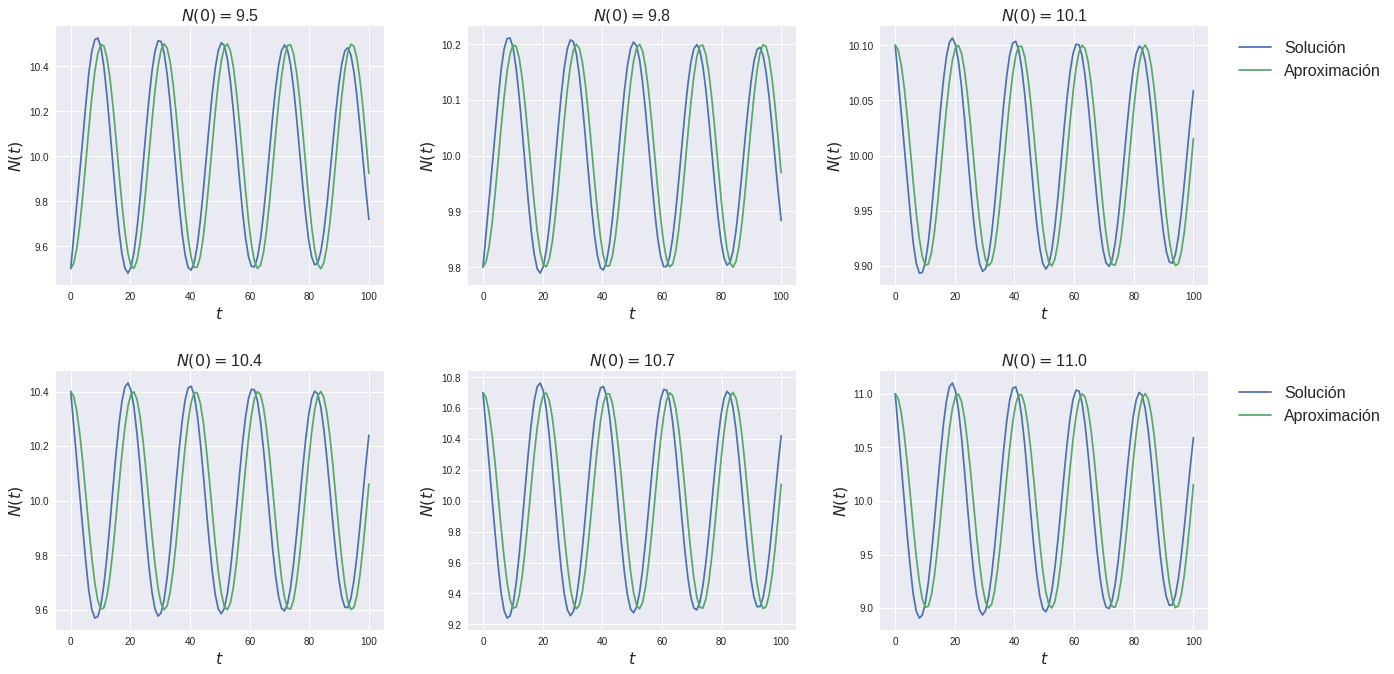

In [ ]:
#@title 
n0 = np.linspace(9.5,11,6)
eps = 1e-4
tf = 100
r = 0.3
K = 10
fig, axs = plt.subplots(2, 3,figsize=(20,10))
for i in range(6):
  tr,yy,n = sol_aprox(r,K,eps,n0[i],tf)
  fila = int(i/3)
  col = int(i%3)
  axs[fila,col].plot(tr,yy,label='Solución')
  axs[fila,col].plot(tr,n,label='Aproximación')
  axs[fila,col].set_xlabel(r'$t$',fontsize=16)
  axs[fila,col].set_ylabel(r'$N(t)$',fontsize=16)
  axs[fila,col].set_title(r'$N(0) =$'+str(n0[i]),fontsize=16)
axs[0,2].legend(bbox_to_anchor=(1.05, 1),fontsize=16)
axs[1,2].legend(bbox_to_anchor=(1.05, 1),fontsize=16)
fig.tight_layout(pad=3.0)
plt.show()

### Amplitud en función de las condiciones iniciales

En tercer lugar, nos piden verificar que la amplitud de las oscilaciones es independiente de las condiciones iniciales $N(0)$. Para ello, una primera aproximación podría ser obtener las soluciones para $K = 10$, $\tau = 1$ y $r = 2$ con diferentes condiciones iniciales, y ponerlas en un mismo gráfico. Esto es lo que hacemos en el siguiente gráfico, para $N(0) = 0.1,1,5,20$. Aproximadamente, se observa que las amplitudes de las oscilaciones son iguales. 

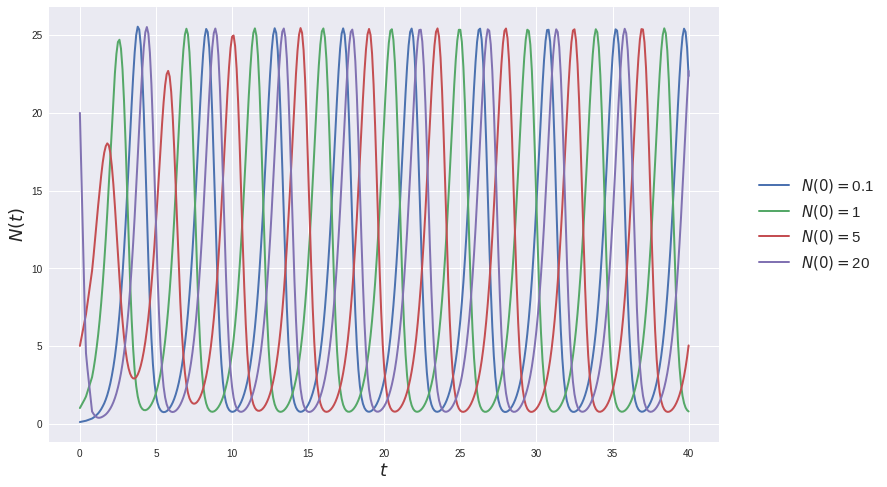

In [ ]:
#@title 
fig = plt.figure(figsize=(12,8))
for n0 in [0.1,1,5,20]:
    g = lambda t : np.array([n0,0])
    tt = np.linspace(0, 40,num=401,dtype=float)
    r = 2.0
    d = 1
    K = 10.0
    yy = ddeint(logistic_delay,g,tt,fargs=(d,r,K,))
    plt.plot(tt,yy[:,0],label=r'$N(0)=$'+str(n0),linewidth=2)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=15)
plt.xlabel(r'$t$',fontsize=18)
plt.ylabel(r'$N(t)$',fontsize=18)
plt.show()

Por otra parte, para verificar esta hipótesis, podemos calcular una amplitud de las oscilaciones a partir de las soluciones numéricas para cada condición inicial. Para ello, encontramos los picos máximos y mínimos de las soluciones, restamos los picos máximos con los mínimos y promediamos para obtener una estimación de la amplitud del ciclo límite para una condición inicial. Haciendo lo mismo para varias de ellas, podemos comparar su influencia en la amplitud de las oscilaciones. Para estar seguros de que estamos analizando el ciclo límite, iteraremos para un tiempo máximo mayor que anteriormente, y utilizaremos la parte de la señal $N(t)$ tal que $ t> 15$ aproximadamente.

A continuación, hacemos esto para 20 condiciones iniciales entre $0.1$ y $5$. Si bien parece haber diferencias que pueden deberse a cuestiones numéricas, observando la escala del gráfico, se concluye que la amplitud permanece aproximadamente constante. 

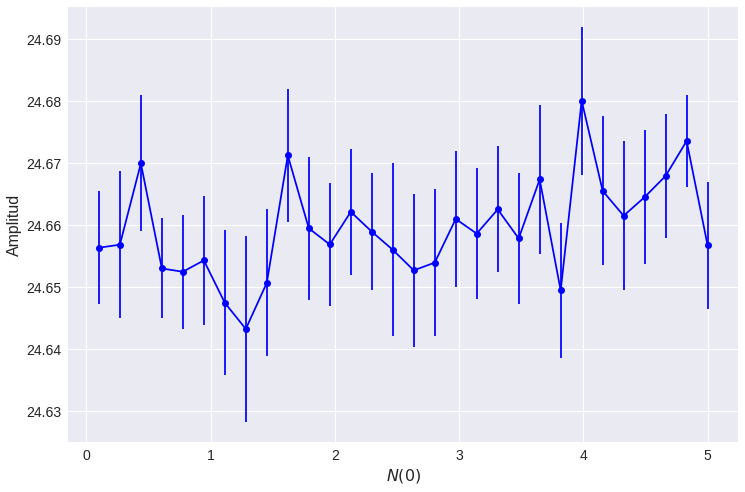

In [ ]:
#@title 
amplitudes = []
std = []
n0 = np.linspace(0.1,5,30)
fig = plt.figure(figsize=(12,8))
for i in list(n0):
    g = lambda t : np.array([i,0])
    tt = np.linspace(0, 100,num=1000,dtype=float)
    r = 2.0
    d = 1
    K = 10.0
    yy = ddeint(logistic_delay,g,tt,fargs=(d,r,K,))
    a = yy[150:,0]
    peaksmax, _ = find_peaks(a, height=0)
    peaksmin, _ = find_peaks(-a,height=-10)
    cmax = len(peaksmax)
    cmin = len(peaksmin)
    if cmax > cmin:
      peaksmax = peaksmax[1:]
    elif (cmax < cmin):
      peaksmin = peaksmin[1:]
    amplitudes.append(np.mean(a[peaksmax]-a[peaksmin]))
    std.append(np.std(a[peaksmax]-a[peaksmin])/(np.sqrt(len(a[peaksmax]))))
plt.xlabel(r'$N(0)$',fontsize=16)
plt.ylabel('Amplitud',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.errorbar(list(n0),amplitudes,yerr=std,fmt='-ob')
plt.show()

En el siguiente gráfico, realizamos el mismo procedimiento para condiciones iniciales entre $12$ y $20$. La razón por la cual hemos separado en dos rangos de condiciones iniciales es la existencia de un equilibrio para $N(t) = 10$, con lo cual la amplitud en las cercanías de esa condición inicial será cercana a cero. Nuevamente, observamos que la amplitud para diferentes condiciones iniciales es aproximadamente constante. 

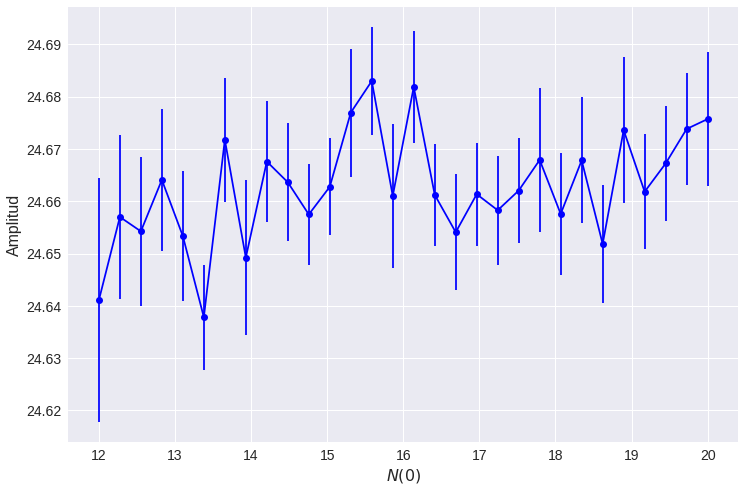

In [ ]:
#@title 
amplitudes = []
std = []
n0 = np.linspace(12,20,30)
fig = plt.figure(figsize=(12,8))
for i in list(n0):
    g = lambda t : np.array([i,0])
    tt = np.linspace(0, 100,num=1000,dtype=float)
    r = 2.0
    d = 1
    K = 10.0
    yy = ddeint(logistic_delay,g,tt,fargs=(d,r,K,))
    a = yy[150:,0]
    peaksmax, _ = find_peaks(a, height=0)
    peaksmin, _ = find_peaks(-a,height=-10)
    cmax = len(peaksmax)
    cmin = len(peaksmin)
    if cmax > cmin:
      peaksmax = peaksmax[1:]
    elif (cmax < cmin):
      peaksmin = peaksmin[1:]
    amplitudes.append(np.mean(a[peaksmax]-a[peaksmin]))
    std.append(np.std(a[peaksmax]-a[peaksmin])/(np.sqrt(len(a[peaksmax]))))
plt.xlabel(r'$N(0)$',fontsize=16)
plt.ylabel('Amplitud',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.errorbar(list(n0),amplitudes,yerr=std,fmt='-ob')
plt.show()

### Período en función de $r$

Finalmente, nos piden verificar que el período de las oscilaciones $T$ es constante e independiente de $r$. 

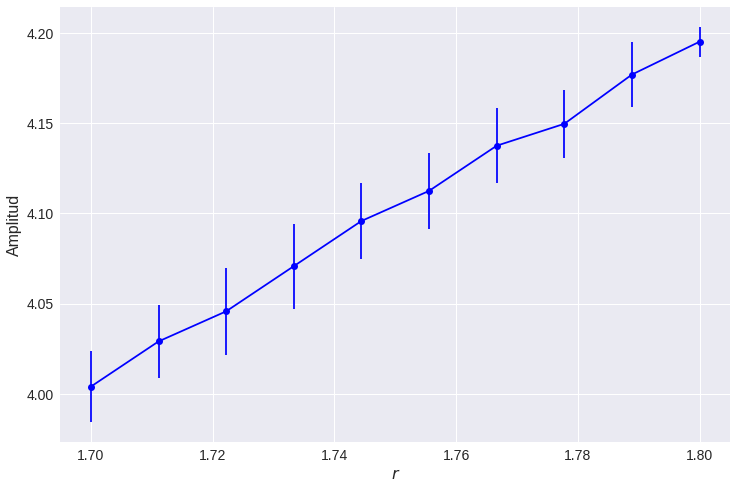

In [60]:
freq = []
std = []
fig = plt.figure(figsize=(12,8))
r = np.linspace(1.7,1.8,10)
for i in list(r):
    n0 = 10.1
    g = lambda t : np.array([n0,0])
    tt = np.linspace(0, 100,num=1000,dtype=float)
    d = 1
    K = 10.0
    yy = ddeint(logistic_delay,g,tt,fargs=(d,i,K,))
    a = yy[500:,0]
    b = tt[500:]
    peaksmax, _ = find_peaks(a, height=0)
    cmax = len(peaksmax)
    freq.append(np.mean(np.diff(b[peaksmax])))
    std.append(np.std(np.diff(b[peaksmax]))/(np.sqrt(len(b[peaksmax]))))
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel('Amplitud',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.errorbar(r,freq,yerr=std,fmt='-ob')
plt.show()

In [108]:
#@title
freq = [] 
std = []
n0 = np.array([9.5])
eps = 1e-5
tf = 100
r = np.linspace(0.3,0.6,20)
K = 10
for i in range(len(r)):
  tr,yy,n = sol_aprox(r[i],K,eps,n0[0],tf)
  a = yy
  b = tr
  peaksmax, _ = find_peaks(a, height=0)
  cmax = len(peaksmax)
  freq.append(np.mean(np.diff(b[peaksmax])))
  std.append(np.std(np.diff(b[peaksmax]))/(np.sqrt(len(b[peaksmax]))))

<ErrorbarContainer object of 3 artists>

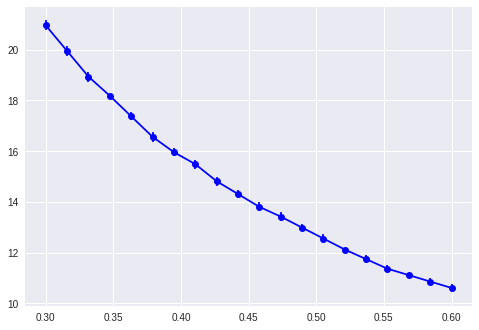

In [109]:
plt.errorbar(r,freq,yerr=std,fmt='-ob')

<ErrorbarContainer object of 3 artists>

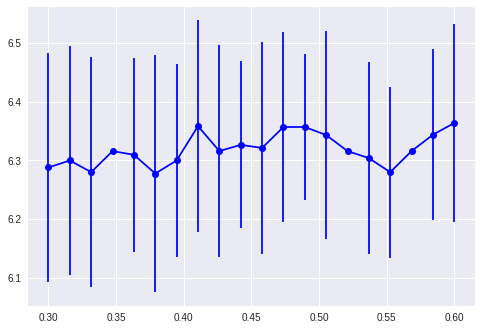

In [110]:
plt.errorbar(r,freq*r,yerr=std,fmt='-ob')